In [1]:
!pip install statsmodels

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import gradio as gr

df = pd.read_csv("data.csv")
df['Date'] = pd.to_datetime(df['Date'])
daily_sales = df.groupby('Date')['Total_Amount'].sum().reset_index()
daily_sales.set_index('Date', inplace=True)

train_size = int(len(daily_sales) * 0.8)
train, test = daily_sales.iloc[:train_size], daily_sales.iloc[train_size:]

model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,7))
fit_model = model.fit(disp=False)

def forecast_sales(steps=30):
    pred = fit_model.get_forecast(steps=steps).predicted_mean
    plt.figure(figsize=(12,6))
    plt.plot(daily_sales.index, daily_sales['Total_Amount'], label="Actual")
    plt.plot(pred.index, pred, label="Forecast", color="red")
    plt.legend()
    plt.title("SARIMA Sales Forecast")
    plt.tight_layout()
    plt.show()
    return pred

demo = gr.Interface(
    fn=forecast_sales,
    inputs=gr.Number(label="Forecast Steps"),
    outputs=gr.Dataframe(headers=["Predicted Sales"])
)

demo.launch()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                      Total_Amount   No. Observations:                  584
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -5547.295
Date:                           Fri, 03 Oct 2025   AIC                          11104.591
Time:                                   15:25:00   BIC                          11126.371
Sample:                               01-01-2023   HQIC                         11113.085
                                    - 08-06-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1399      0.038      3.697      0.000       0.066       0.214
ma.L1         -0.9988      0.075    -13.252

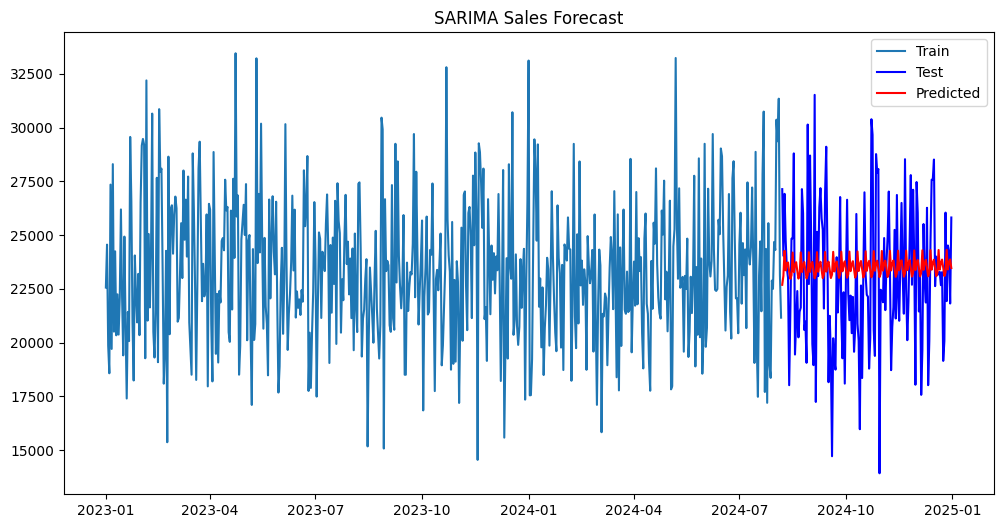

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Load data
df = pd.read_csv("data.csv")
df['Date'] = pd.to_datetime(df['Date'])
daily_sales = df.groupby('Date')['Total_Amount'].sum().reset_index()
daily_sales.set_index('Date', inplace=True)

# 2. Train-test split
train_size = int(len(daily_sales) * 0.8)
train, test = daily_sales.iloc[:train_size], daily_sales.iloc[train_size:]

# 3. Fit SARIMA manually
# (you can tune order=(p,d,q), seasonal_order=(P,D,Q,s))
model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,7))
fit_model = model.fit(disp=False)
print(fit_model.summary())

# 4. Forecast
predictions = fit_model.get_forecast(steps=len(test)).predicted_mean

# 5. Accuracy
mape = np.mean(np.abs((test['Total_Amount'] - predictions) / test['Total_Amount'])) * 100
accuracy = 100 - mape
print(f"Model Accuracy: {accuracy:.2f}%")

# 6. Plot
plt.figure(figsize=(12,6))
plt.plot(train.index, train['Total_Amount'], label="Train")
plt.plot(test.index, test['Total_Amount'], label="Test", color="blue")
plt.plot(predictions.index, predictions, label="Predicted", color="red")
plt.legend()
plt.title(f"SARIMA Sales Forecast")
plt.show()
